## 16.2 R 예제 - {multtest} 패키지 이용
### 예제 16.1
#### (1) {multtest} 패키지 설치

In [1]:
if (!requireNamespace("BiocManager", quietly = TRUE))
  install.packages("BiocManager")
BiocManager::install("multtest")
library(multtest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.17 (BiocManager 1.30.21), R 4.3.1 (2023-06-16)

Installing package(s) 'BiocVersion', 'multtest'

also installing the dependencies ‘BiocGenerics’, ‘Biobase’


Old packages: 'bit', 'curl', 'dbplyr', 'devtools', 'digest', 'gert', 'highr',
  'isoband', 'pkgload', 'readxl', 'roxygen2', 'rstudioapi', 'testthat',
  'tidyverse', 'whisker', 'xml2', 'boot', 'foreign', 'KernSmooth', 'Matrix',
  'mgcv'

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname

#### (2) 분석자료 : golub, golub.gnames, golub.cl

In [2]:
data(golub)
str(golub)
str(golub.gnames)

 num [1:3051, 1:38] -1.458 -0.752 0.457 3.135 2.766 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : NULL
 chr [1:3051, 1:3] "36" "37" "38" "39" "40" "41" "42" "43" "45" "46" "48" ...


In [3]:
golub.gnames[1:4,]

36,AFFX-HUMISGF3A/M97935_MA_at (endogenous control),AFFX-HUMISGF3A/M97935_MA_at
37,AFFX-HUMISGF3A/M97935_MB_at (endogenous control),AFFX-HUMISGF3A/M97935_MB_at
38,AFFX-HUMISGF3A/M97935_3_at (endogenous control),AFFX-HUMISGF3A/M97935_3_at
39,AFFX-HUMRGE/M10098_5_at (endogenous control),AFFX-HUMRGE/M10098_5_at


In [4]:
golub.cl

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1

#### (3) 유전자별 검정통계량

In [5]:
teststat = mt.teststat(golub, golub.cl)
str(teststat)

 num [1:3051] 1.759 0.91 -0.098 -0.339 -1.37 ...


In [6]:
parts = mt.teststat.num.denum(golub, golub.cl)
names(parts)
head(parts)

[1] "teststat.num"   "teststat.denum"

,teststat.num,teststat.denum
,<dbl>,<dbl>
1,0.49226310,0.2798229
2,0.21787189,0.2394571
3,-0.01993869,0.2034022
4,-0.16946771,0.4999595
5,-0.72659579,0.5302981
6,-0.62997545,0.4979837


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


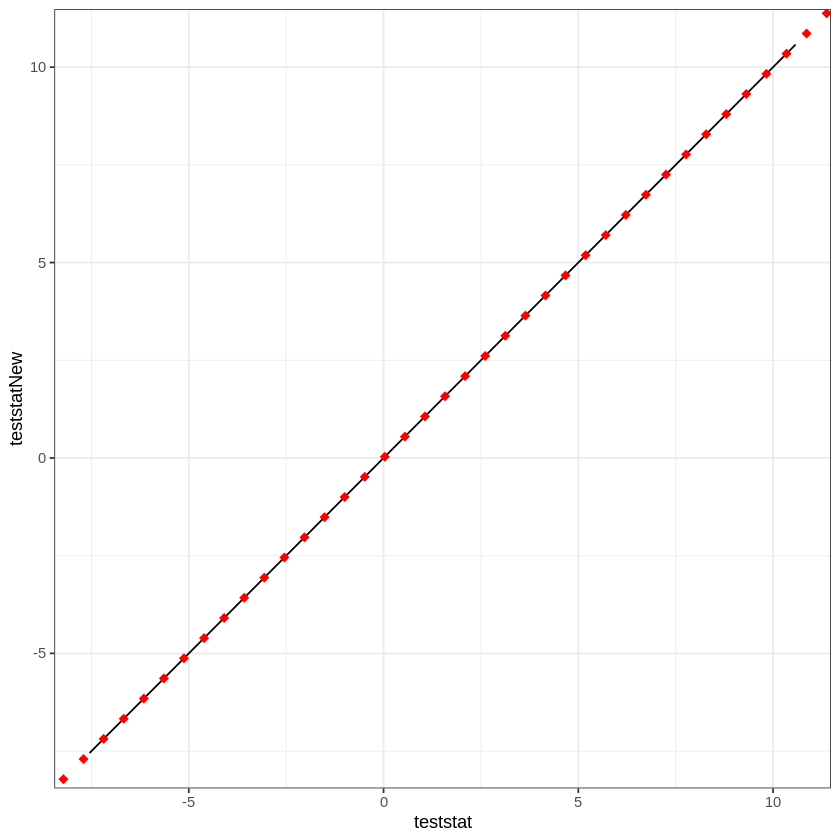

In [7]:
teststatNew = parts$teststat.num / parts$teststat.denum
install.packages("ggplot2")
library(ggplot2)
plt = ggplot(data.frame(teststat, teststatNew), aes(x = teststat, y = teststatNew)) +
  geom_line() + geom_abline(colour = "red", linetype = "dotted", size = 2) +
  theme_bw()
plt

#### (4) 유전자별 p-값과 조정된 p-값

In [8]:
rawp = 2 * (1 - pnorm(abs(teststat)))
procedures = c("Bonferroni", "Holm", "Hochberg", "SidakSS", "SidakSD", "BH", "BY")
adjusted = mt.rawp2adjp(rawp, procedures)
round(adjusted$adjp[1:10, ], 5)

rawp,Bonferroni,Holm,Hochberg,SidakSS,SidakSD,BH,BY
0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0


In [9]:
round(adjusted$adjp[order(adjusted$index)[1:10], ], 5)

rawp,Bonferroni,Holm,Hochberg,SidakSS,SidakSD,BH,BY
0.07854,1,1,0.99984,1,1,0.18196,1
0.36290,1,1,0.99984,1,1,0.53546,1
0.92191,1,1,0.99984,1,1,0.95900,1
0.73464,1,1,0.99984,1,1,0.83853,1
0.17064,1,1,0.99984,1,1,0.31880,1
0.20585,1,1,0.99984,1,1,0.36178,1
0.47020,1,1,0.99984,1,1,0.63787,1
0.59365,1,1,0.99984,1,1,0.73747,1
0.98667,1,1,0.99984,1,1,0.99318,1
0.89268,1,1,0.99984,1,1,0.94287,1


#### (5) 순열방법(maxT)
#### 1) mt.maxT(), mt.minP() 함수 : 하향식 maxT와 minP 다중검정 절차를 수행

In [10]:
resT = mt.maxT(golub, golub.cl, B = 10000)
head(resT)

b=100	b=200	b=300	b=400	b=500	b=600	b=700	b=800	b=900	b=1000	
b=1100	b=1200	b=1300	b=1400	b=1500	b=1600	b=1700	b=1800	b=1900	b=2000	
b=2100	b=2200	b=2300	b=2400	b=2500	b=2600	b=2700	b=2800	b=2900	b=3000	
b=3100	b=3200	b=3300	b=3400	b=3500	b=3600	b=3700	b=3800	b=3900	b=4000	
b=4100	b=4200	b=4300	b=4400	b=4500	b=4600	b=4700	b=4800	b=4900	b=5000	
b=5100	b=5200	b=5300	b=5400	b=5500	b=5600	b=5700	b=5800	b=5900	b=6000	
b=6100	b=6200	b=6300	b=6400	b=6500	b=6600	b=6700	b=6800	b=6900	b=7000	
b=7100	b=7200	b=7300	b=7400	b=7500	b=7600	b=7700	b=7800	b=7900	b=8000	
b=8100	b=8200	b=8300	b=8400	b=8500	b=8600	b=8700	b=8800	b=8900	b=9000	
b=9100	b=9200	b=9300	b=9400	b=9500	b=9600	b=9700	b=9800	b=9900	b=10000	


,index,teststat,rawp,adjp
,<dbl>,<dbl>,<dbl>,<dbl>
2124,2124,10.577748,1e-04,1e-04
829,829,9.775847,1e-04,1e-04
896,896,8.032939,1e-04,1e-04
766,766,7.983260,1e-04,1e-04
2600,2600,7.965528,1e-04,1e-04
2939,2939,-7.548348,1e-04,5e-04


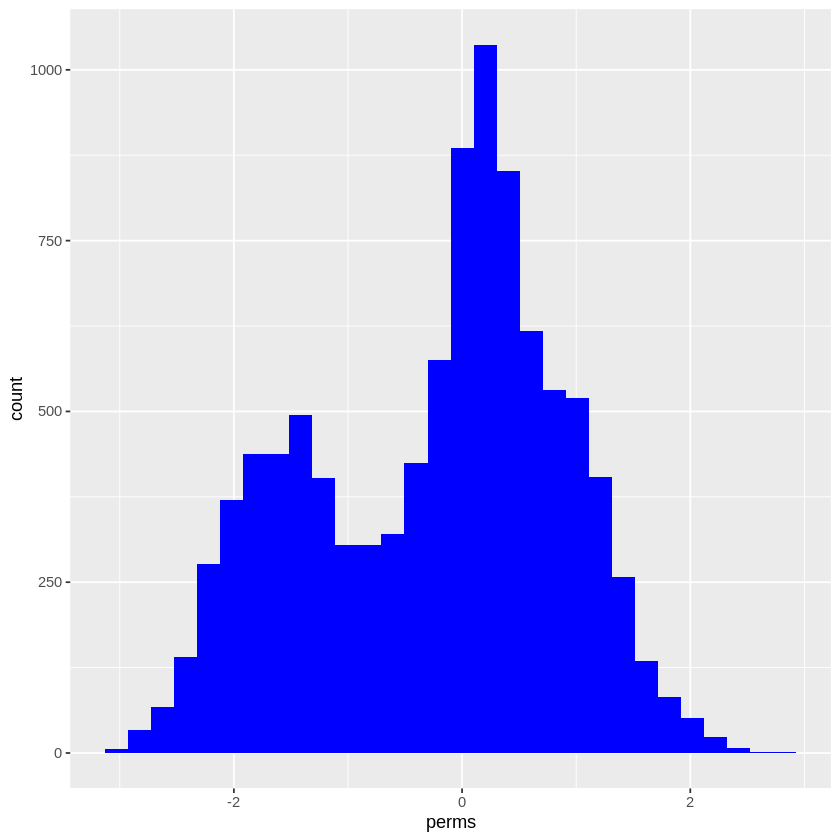

In [11]:
perms = as.numeric(mt.sample.teststat(golub[1, ], golub.cl, B = 10000))
plt = ggplot(data.frame(perms), aes(x = perms)) + geom_histogram(bins = 30, fill = "blue")
plt

In [12]:
resT = mt.maxT(matrix(golub[1, ], nrow = 1), golub.cl, B = 10000)

b=100	b=200	b=300	b=400	b=500	b=600	b=700	b=800	b=900	b=1000	
b=1100	b=1200	b=1300	b=1400	b=1500	b=1600	b=1700	b=1800	b=1900	b=2000	
b=2100	b=2200	b=2300	b=2400	b=2500	b=2600	b=2700	b=2800	b=2900	b=3000	
b=3100	b=3200	b=3300	b=3400	b=3500	b=3600	b=3700	b=3800	b=3900	b=4000	
b=4100	b=4200	b=4300	b=4400	b=4500	b=4600	b=4700	b=4800	b=4900	b=5000	
b=5100	b=5200	b=5300	b=5400	b=5500	b=5600	b=5700	b=5800	b=5900	b=6000	
b=6100	b=6200	b=6300	b=6400	b=6500	b=6600	b=6700	b=6800	b=6900	b=7000	
b=7100	b=7200	b=7300	b=7400	b=7500	b=7600	b=7700	b=7800	b=7900	b=8000	
b=8100	b=8200	b=8300	b=8400	b=8500	b=8600	b=8700	b=8800	b=8900	b=9000	
b=9100	b=9200	b=9300	b=9400	b=9500	b=9600	b=9700	b=9800	b=9900	b=10000	


In [13]:
resT$rawp

[1] 0.1385

#### 2) mt.reject() 함수 : 다중검정에서 기각된 가설의 수와 개체

In [14]:
resT = mt.maxT(golub, golub.cl, B = 10000)
ord = order(resT$index)
rawp = resT$rawp[ord]
maxT = resT$adjp[ord]
teststat = resT$teststat[ord]
mt.reject(cbind(rawp, maxT), seq(0, 1, 0.1))$r

b=100	b=200	b=300	b=400	b=500	b=600	b=700	b=800	b=900	b=1000	
b=1100	b=1200	b=1300	b=1400	b=1500	b=1600	b=1700	b=1800	b=1900	b=2000	
b=2100	b=2200	b=2300	b=2400	b=2500	b=2600	b=2700	b=2800	b=2900	b=3000	
b=3100	b=3200	b=3300	b=3400	b=3500	b=3600	b=3700	b=3800	b=3900	b=4000	
b=4100	b=4200	b=4300	b=4400	b=4500	b=4600	b=4700	b=4800	b=4900	b=5000	
b=5100	b=5200	b=5300	b=5400	b=5500	b=5600	b=5700	b=5800	b=5900	b=6000	
b=6100	b=6200	b=6300	b=6400	b=6500	b=6600	b=6700	b=6800	b=6900	b=7000	
b=7100	b=7200	b=7300	b=7400	b=7500	b=7600	b=7700	b=7800	b=7900	b=8000	
b=8100	b=8200	b=8300	b=8400	b=8500	b=8600	b=8700	b=8800	b=8900	b=9000	
b=9100	b=9200	b=9300	b=9400	b=9500	b=9600	b=9700	b=9800	b=9900	b=10000	


,rawp,maxT
0,0,0
0.1,1324,119
0.2,1661,150
0.3,1900,178
0.4,2090,202
0.5,2263,237
0.6,2441,265
0.7,2611,311
0.8,2755,354
0.9,2893,409


In [15]:
which = mt.reject(cbind(rawp, maxT), 0.01)
names(which)

[1] "r"     "which"

In [16]:
which$r

,rawp,maxT
0.01,650,39


In [17]:
str(which$which)

 logi [1:3051, 1:2] FALSE FALSE FALSE FALSE FALSE FALSE ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:2] "rawp" "maxT"


In [18]:
head(which$which)

rawp,maxT
FALSE,FALSE
FALSE,FALSE
FALSE,FALSE
FALSE,FALSE
FALSE,FALSE
FALSE,FALSE


In [19]:
tail(which$which)

,rawp,maxT
"[3046,]",TRUE,TRUE
"[3047,]",FALSE,FALSE
"[3048,]",FALSE,FALSE
"[3049,]",FALSE,FALSE
"[3050,]",FALSE,FALSE
"[3051,]",TRUE,FALSE


In [20]:
which = mt.reject(cbind(rawp, maxT), 0.01)$which[, 2]
golub.gnames[which, 2]

[1] "CYSTATIN A"                                                                                                     
 [2] "Macmarcks"                                                                                                      
 [3] "SPTAN1 Spectrin, alpha, non-erythrocytic 1 (alpha-fodrin)"                                                      
 [4] "IEF SSP 9502 mRNA"                                                                                              
 [5] "INDUCED MYELOID LEUKEMIA CELL DIFFERENTIATION PROTEIN MCL1"                                                     
 [6] "RB1 Retinoblastoma 1 (including osteosarcoma)"                                                                  
 [7] "Inducible protein mRNA"                                                                                         
 [8] "LYN V-yes-1 Yamaguchi sarcoma viral related oncogene homolog"                                                   
 [9] "CD33 CD33 antigen (differentiation antigen)"                                                                    
[10] "CST3 Cystatin C (amyloid angiopathy and cerebral hemorrhage)"                                                   
[11] "FAH Fumarylacetoacetate"                                                                                        
[12] "CTSD Cathepsin D (lysosomal aspartyl protease)"                                                                 
[13] "ACADM Acyl-Coenzyme A dehydrogenase, C-4 to C-12 straight chain"                                                
[14] "CCND3 Cyclin D3"                                                                                                
[15] "HKR-T1"                                                                                                         
[16] "Cytoplasmic dynein light chain 1 (hdlc1) mRNA"                                                                  
[17] "Leukotriene C4 synthase (LTC4S) gene"                                                                           
[18] "Putative enterocyte differentiation promoting factor mRNA, partial cds"                                         
[19] "Lysophospholipase homolog (HU-K5) mRNA"                                                                         
[20] "GB DEF = Homeodomain protein HoxA9 mRNA"                                                                        
[21] "PLECKSTRIN"                                                                                                     
[22] "IRF2 Interferon regulatory factor 2"                                                                            
[23] "VIL2 Villin 2 (ezrin)"                                                                                          
[24] "ME491  gene extracted from H.sapiens gene for Me491/CD63 antigen"                                               
[25] "RETINOBLASTOMA BINDING PROTEIN P48"                                                                             
[26] "T-COMPLEX PROTEIN 1, GAMMA SUBUNIT"                                                                             
[27] "Zyxin"                                                                                                          
[28] "LEPR Leptin receptor"                                                                                           
[29] "TOP2B Topoisomerase (DNA) II beta (180kD)"                                                                      
[30] "C-myb gene extracted from Human (c-myb) gene, complete primary cds, and five complete alternatively spliced cds"
[31] "APLP2 Amyloid beta (A4) precursor-like protein 2"                                                               
[32] "TCRA T cell receptor alpha-chain"                                                                               
[33] "Interleukin 8 (IL8) gene"                                                                                       
[34] "INTERLEUKIN-8 PRECURSOR"                                            

#### 3) mt.plot() 함수 : 다중검정 결과의 시각화

In [21]:
res = mt.rawp2adjp(rawp, c("Bonferroni", "BH", "BY"))
adjp = res$adjp[order(res$index), ]
allp = cbind(adjp, maxT)
dimnames(allp)[[2]] = c(dimnames(adjp)[[2]], "maxT")
procs = dimnames(allp)[[2]]
procs

[1] "rawp"       "Bonferroni" "BH"         "BY"         "maxT"

In [22]:
procs = procs[c(1, 2, 5, 3, 4)]
procs

[1] "rawp"       "Bonferroni" "maxT"       "BH"         "BY"

In [23]:
head(allp[, procs])

rawp,Bonferroni,maxT,BH,BY
0.1385,1,1,0.2894271,1
0.3915,1,1,0.5742627,1
0.9236,1,1,0.9622465,1
0.7378,1,1,0.8452977,1
0.1799,1,1,0.3452043,1
0.2182,1,1,0.3877275,1


In [24]:
str(teststat)

 num [1:3051] 1.759 0.91 -0.098 -0.339 -1.37 ...


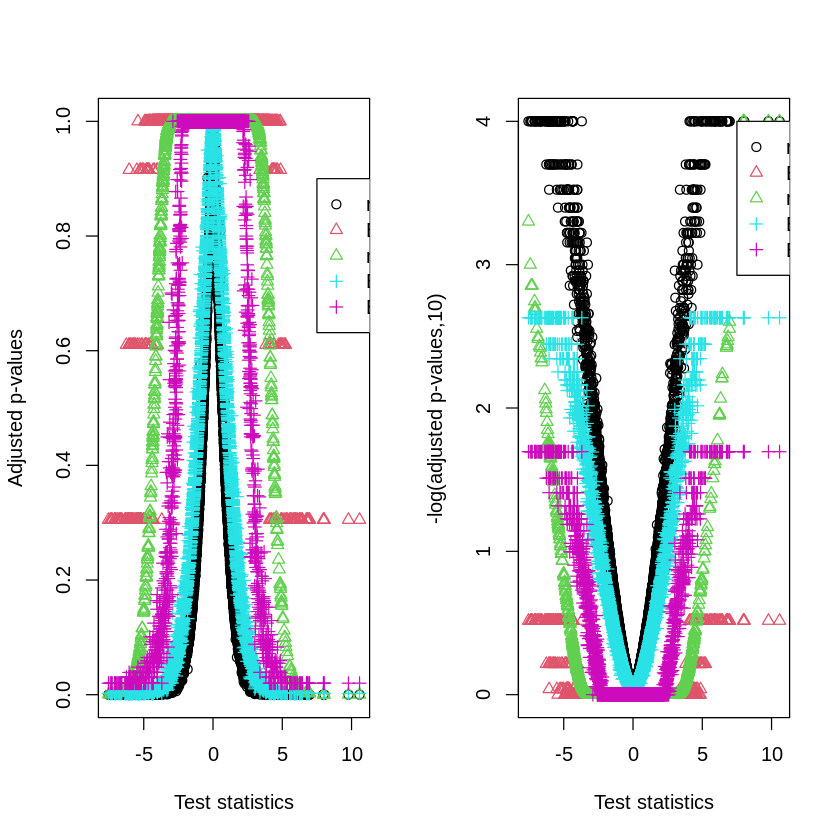

In [25]:
cols = c(1, 2, 3, 5, 6)
ltypes = c(1, 2, 2, 3, 3)
par(mfrow = c(1, 2))
mt.plot(allp[, procs], teststat, plottype = "pvst", proc = procs, leg = c(7.5, 0.9),
        pch = ltypes, col = cols)
mt.plot(allp[, procs], teststat, plottype = "pvst", logscale = TRUE, proc = procs,
        leg = c(7.5, 4), pch = ltypes, col = cols)

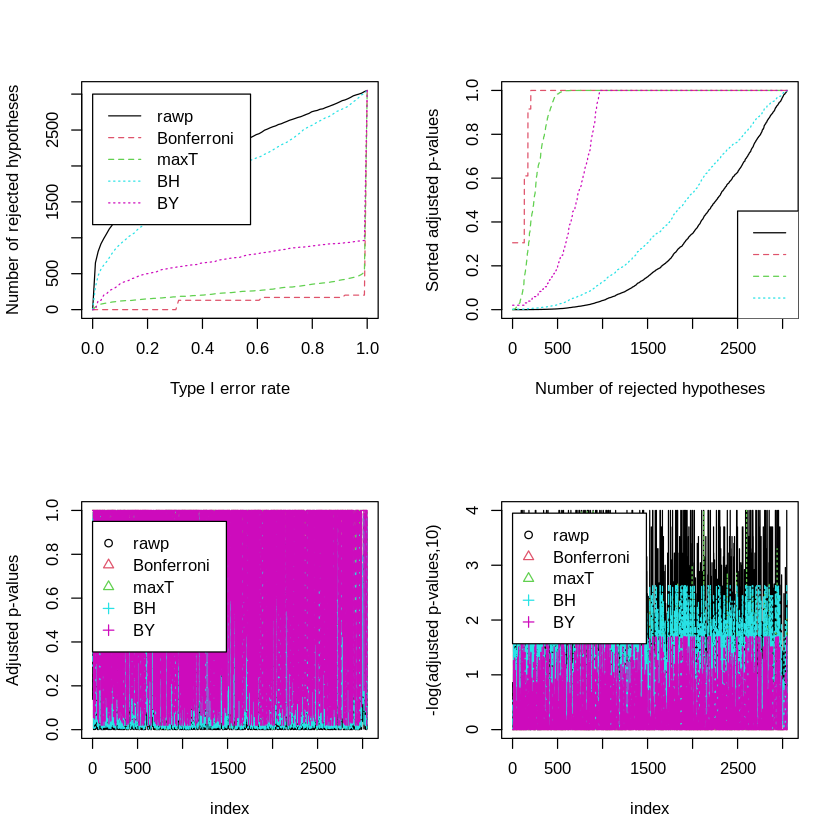

In [26]:
par(mfrow = c(2, 2))
mt.plot(allp[, procs], teststat, plottype = "rvsa", proc = procs, leg = c(0.0, 3000),
        lty = ltypes, col = cols)
mt.plot(allp[, procs], teststat, plottype = "pvsr", proc = procs, leg = c(2500, 0.45),
        lty = ltypes, col = cols)
mt.plot(allp[, procs], teststat, plottype = "pvsi", proc = procs, leg = c(0.0, 0.95),
        pch = ltypes, col = cols)
mt.plot(allp[, procs], teststat, plottype = "pvsi", logscale = TRUE,  proc = procs,
        leg = c(0.0, 3.95), pch = ltypes, col = cols)

#### 6) MTP() 함수 : 재표본 기반의 다중검정을 수행

In [27]:
fwer = MTP(matrix(golub[1, ], nrow = 1), Y = golub.cl, typeone = "fwer")
summary(fwer)

running bootstrap...
iteration = 100 200 300 400 500 600 700 800 900 1000

MTP:  ss.maxT 
Type I error rate:  fwer 

  Level Rejections
1  0.05          1

               Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
adjp      0.0260000 0.0260000 0.0260000 0.0260000 0.0260000 0.0260000    0
rawp      0.0260000 0.0260000 0.0260000 0.0260000 0.0260000 0.0260000    0
statistic 1.7591952 1.7591952 1.7591952 1.7591952 1.7591952 1.7591952    0
estimate  0.4922631 0.4922631 0.4922631 0.4922631 0.4922631 0.4922631    0


In [28]:
fdr = MTP(matrix(golub[1, ], nrow = 1), Y = golub.cl, typeone = "fdr")
summary(fdr)

running bootstrap...
iteration = 100 200 300 400 500 600 700 800 900 1000

MTP:  ss.maxT 
Type I error rate:  fdr (conservative) 

  Level Rejections
1  0.05          1

               Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
adjp      0.0440000 0.0440000 0.0440000 0.0440000 0.0440000 0.0440000    0
rawp      0.0220000 0.0220000 0.0220000 0.0220000 0.0220000 0.0220000    0
statistic 1.7591952 1.7591952 1.7591952 1.7591952 1.7591952 1.7591952    0
estimate  0.4922631 0.4922631 0.4922631 0.4922631 0.4922631 0.4922631    0


In [29]:
fwer = MTP(golub, Y = golub.cl, typeone = "fwer")
summary(fwer)

running bootstrap...
iteration = 100 200 300 400 500 600 700 800 900 1000

MTP:  ss.maxT 
Type I error rate:  fwer 

  Level Rejections
1  0.05         39

               Min.    1st Qu.      Median          Mean   3rd Qu.      Max.
adjp       0.001000  0.9720000  1.00000000  8.926542e-01 1.0000000  1.000000
rawp       0.000000  0.0100000  0.11900000  2.643471e-01 0.4785000  1.000000
statistic -7.548348 -1.6739768 -0.06979813 -1.928619e-01 1.3516975 10.577748
estimate  -2.159511 -0.2559319 -0.01274879  1.928495e-07 0.2186592  2.891941
          NA's
adjp         0
rawp         0
statistic    0
estimate     0


In [30]:
fdr = MTP(golub, Y = golub.cl, typeone = "fdr")
summary(fdr)

running bootstrap...
iteration = 100 200 300 400 500 600 700 800 900 1000

MTP:  ss.maxT 
Type I error rate:  fdr (conservative) 

  Level Rejections
1  0.05         18

               Min.    1st Qu.      Median          Mean   3rd Qu.      Max.
adjp       0.004000  1.0000000  1.00000000  9.206014e-01 1.0000000  1.000000
rawp       0.000000  0.0110000  0.12200000  2.642498e-01 0.4765000  1.000000
statistic -7.548348 -1.6739768 -0.06979813 -1.928619e-01 1.3516975 10.577748
estimate  -2.159511 -0.2559319 -0.01274879  1.928495e-07 0.2186592  2.891941
          NA's
adjp         0
rawp         0
statistic    0
estimate     0
